# CREDIT CARD FRAUD DETECTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Data Preprocessing

In [2]:
## Reading data 

data = pd.read_csv('creditcard.csv')
data.drop(['Time'], axis = 1, inplace = True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## Normalizing the 'Amount' data

scaler = StandardScaler()

data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.231676,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350496,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.139187,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.128182,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083837,0


In [4]:
## Getting class labels

y = data['Class']
X = data.drop(['Class'], 1)

In [5]:
## Splitting data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape

(192396, 29)

In [6]:
y_train.shape

(192396,)

## LOGISTIC REGRESSION

In [7]:
## Training the model

logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
## Predict with the testing data

pred = logisticreg.predict(X_test)
print("Model Trained")

Model Trained


In [9]:
## Calculating accuracy

accuracy_logistic = logisticreg.score(X_test, y_test)
print("Accuracy is: ", (accuracy_logistic*100))

Accuracy is:  99.91891723320651


#### Confusion matrix

In [10]:
## Confusion matrix

print(confusion_matrix(y_test, pred))

[[48002     7]
 [   32    58]]


#### Classification Report

In [11]:
## Classification report

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     48009
          1       0.89      0.64      0.75        90

avg / total       1.00      1.00      1.00     48099



#### ROC curve and AUC

In [12]:
fpr, tpr, thres = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8221493192248674


#### Plotting ROC curve

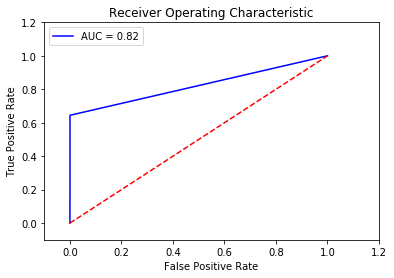

In [13]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## DECISION TREE

In [14]:
## Training the model

treeClassifier = DecisionTreeClassifier(criterion='gini',splitter = "best")
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
## Predict with the testing data

tree_pred = treeClassifier.predict(X_test)
print("Model Trained")

Model Trained


In [16]:
## Calculating accuracy

accuracy_tree = treeClassifier.score(X_test, y_test)
print("Accuracy is: ", (accuracy_tree*100))

Accuracy is:  99.91268009729933


#### Confusion matrix

In [17]:
## Confusion matrix

print(confusion_matrix(y_test, tree_pred))

[[47986    23]
 [   19    71]]


#### Classification Report

In [18]:
## Classification report

print(classification_report(y_test, tree_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     48009
          1       0.76      0.79      0.77        90

avg / total       1.00      1.00      1.00     48099



## NAIVE BAYES

In [19]:
## Training the model

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [20]:
## Predict with the testing data

nb_pred = nb.predict(X_test)
print("Model Trained")

Model Trained


In [21]:
## Calculating accuracy

accuracy_nb = nb.score(X_test, y_test)
print("Accuracy is: ", (accuracy_nb*100))

Accuracy is:  97.78165866234225


#### Confusion matrix

In [22]:
## Confusion matrix

print(confusion_matrix(y_test, nb_pred))

[[46955  1054]
 [   13    77]]


#### Classification report

In [23]:
## Classification report

print(classification_report(y_test, nb_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     48009
          1       0.07      0.86      0.13        90

avg / total       1.00      0.98      0.99     48099



#### ROC curve and AUC

In [24]:
fpr_nb, tpr_nb, thres_nb = roc_curve(y_test, nb_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print(roc_auc_nb)

0.9168006693189472


#### Plotting ROC curve

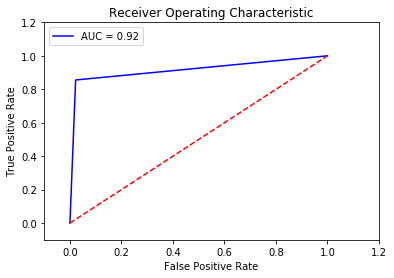

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label='AUC = %0.2f'% roc_auc_nb)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()